In [1]:
!gdown --id 1pQUWRkx9QPB_BpPN2BiJ3dSy2OEmDjbq  #데이터 다운 

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1pQUWRkx9QPB_BpPN2BiJ3dSy2OEmDjbq
To: /content/spaceship-titanic.zip
100% 306k/306k [00:00<00:00, 47.0MB/s]


In [2]:
!unzip ./spaceship-titanic.zip

Archive:  ./spaceship-titanic.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


> ## 데이터 확인 

In [184]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [185]:
#데이터 프레임으로 저장 
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


In [ ]:
train.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [ ]:
test.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
5,0027_01,Earth,False,F/7/P,TRAPPIST-1e,31.0,False,0.0,1615.0,263.0,113.0,60.0,Karlen Ricks
6,0029_01,Europa,True,B/2/P,55 Cancri e,21.0,False,0.0,NaN,0.0,0.0,0.0,Aldah Ainserfle
7,0032_01,Europa,True,D/0/S,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Acrabi Pringry
8,0032_02,Europa,True,D/0/S,55 Cancri e,23.0,False,0.0,0.0,0.0,0.0,0.0,Dhena Pringry
9,0033_01,Earth,False,F/7/S,55 Cancri e,24.0,False,0.0,639.0,0.0,0.0,0.0,Eliana Delazarson


In [ ]:
#데이터 전처리 
#1. 결측치 확인 

train.info(), train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


(None, PassengerId       0
 HomePlanet      201
 CryoSleep       217
 Cabin           199
 Destination     182
 Age             179
 VIP             203
 RoomService     181
 FoodCourt       183
 ShoppingMall    208
 Spa             183
 VRDeck          188
 Name            200
 Transported       0
 dtype: int64)

In [ ]:
test.info(), test.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


(None, PassengerId       0
 HomePlanet       87
 CryoSleep        93
 Cabin           100
 Destination      92
 Age              91
 VIP              93
 RoomService      82
 FoodCourt       106
 ShoppingMall     98
 Spa             101
 VRDeck           80
 Name             94
 dtype: int64)

In [ ]:
#데이터 타입과 종류 확인 

train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [ ]:
train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

> ## EDA 진행

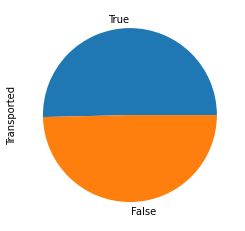

In [ ]:
#EDA 진행

train['Transported'].value_counts().plot.pie()

In [ ]:
sns.style = 'darkgrid' 

In [ ]:
# 이후에 먼저 수치형 데이터들에 대한 분석을 진행한다. 
num_cols = train.select_dtypes(exclude = 'object')
num_cols.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported'],
      dtype='object')

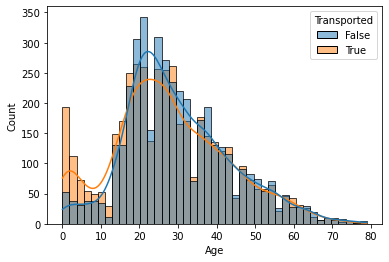

In [ ]:
#나이와 이동의 관계 파악 
sns.histplot(train, x = 'Age', hue = 'Transported', kde = True)

# 1. 나이가 10대 중반까지는 살 확률이 높음
# 2. 나이가 10대 후반 ~ 20대 후반까지는 살 확률이 낮음
# 3. 나머지는 비슷비슷함. 

In [ ]:
num_cols.columns
#나머지 파악하기. 
#진행한 Age 랑 target인 transported 제거 
del num_cols['Age']
del num_cols['Transported']

In [ ]:
num_cols.columns


Index(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

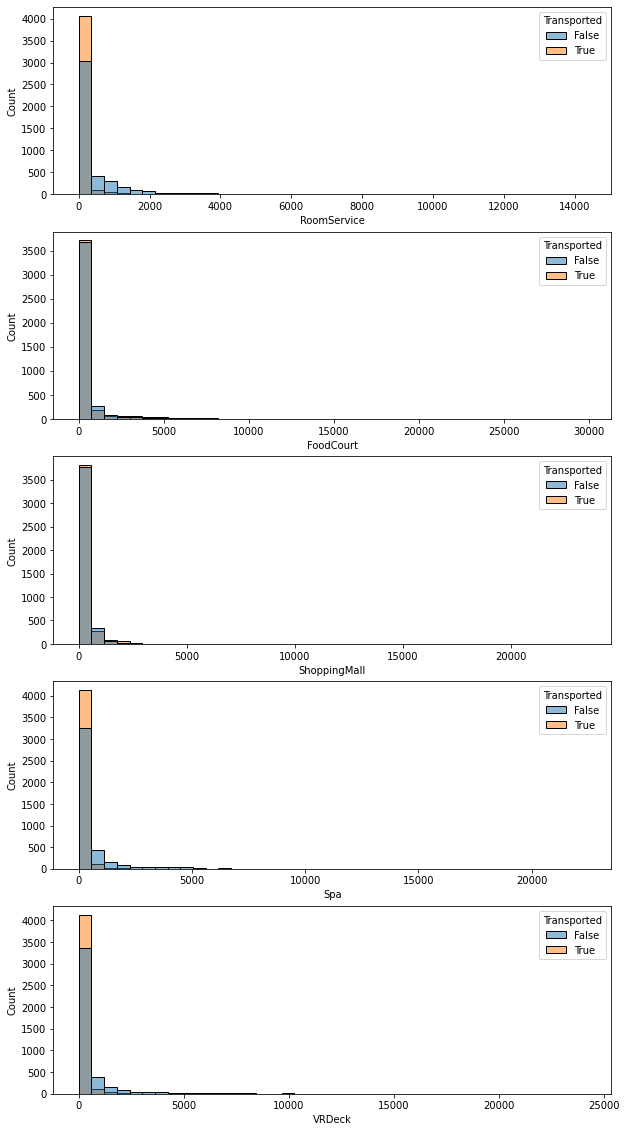

In [ ]:
#나머지 그래프 한번에 보기 
fig = plt.figure(figsize = (10,20))
for i in range(len(num_cols.columns)):
    fig.add_subplot(len(num_cols.columns),1,i+1)
    sns.histplot(train, x = num_cols.columns[i], bins = 40,  hue = "Transported")

plt.show()
#1. A그룹(roomservice, spa, vrDeck 의 분포가 비슷하고 ) B그룹(foodCourt, shoppingmall 의 분포가 비슷하다.)
#2  돈을 쓴사람이 이동이 덜됨 . . 
#3. 돈을 안쓴사람이 대부분이다. ( 숙면자 ? )

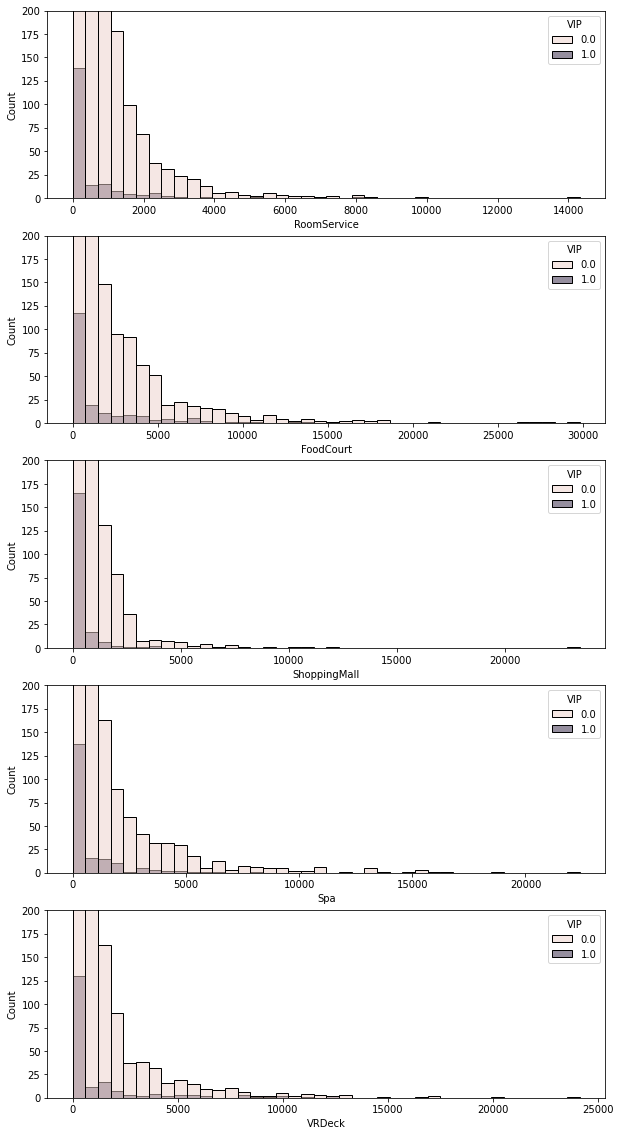

In [ ]:
#나머지 그래프 한번에 보기 
fig = plt.figure(figsize = (10,20))
for i in range(len(num_cols.columns)):
    fig.add_subplot(len(num_cols.columns),1,i+1)
    sns.histplot(train, x = num_cols.columns[i], bins = 40,  hue = "VIP")
    plt.ylim([0,200])
plt.show()
#1. VIP기준으로 봤을때도 비슷한 결과 

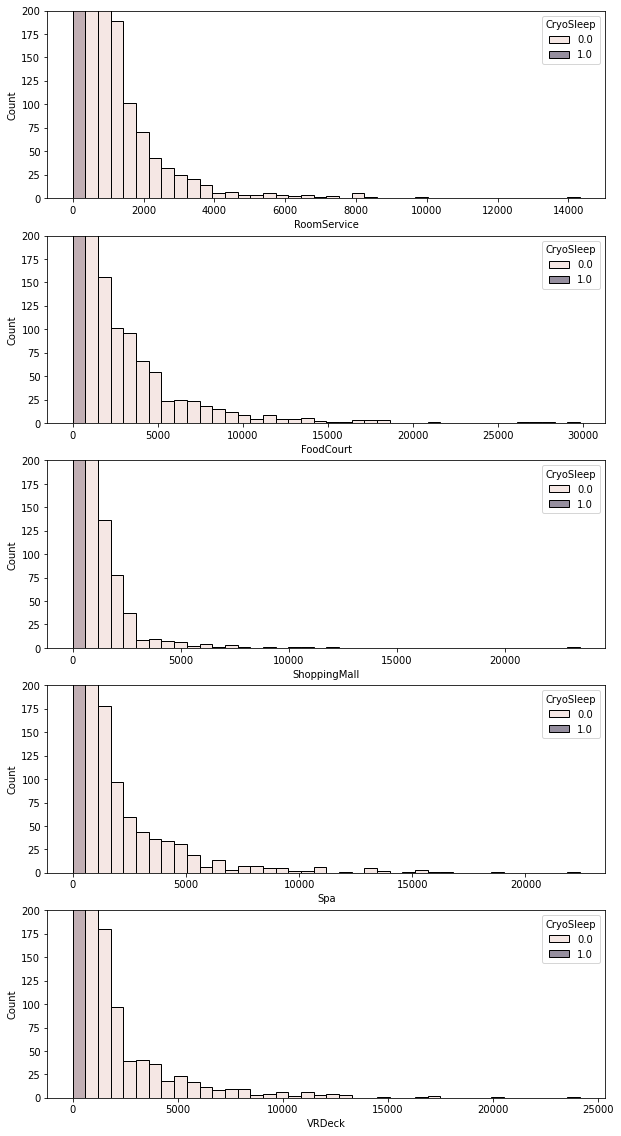

In [ ]:
#나머지 그래프 한번에 보기 
fig = plt.figure(figsize = (10,20))
for i in range(len(num_cols.columns)):
    fig.add_subplot(len(num_cols.columns),1,i+1)
    sns.histplot(train, x = num_cols.columns[i], bins = 40,  hue = "CryoSleep")
    plt.ylim([0,200])
plt.show()
#1. 냉동수면면기준으로 봤을때 당연하겠지만 자는 사람은 소비를 하지 않았다 

In [ ]:
#카테고리컬 변수 분석
cat_cols = train.select_dtypes(include = 'object')
cat_cols.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name'],
      dtype='object')

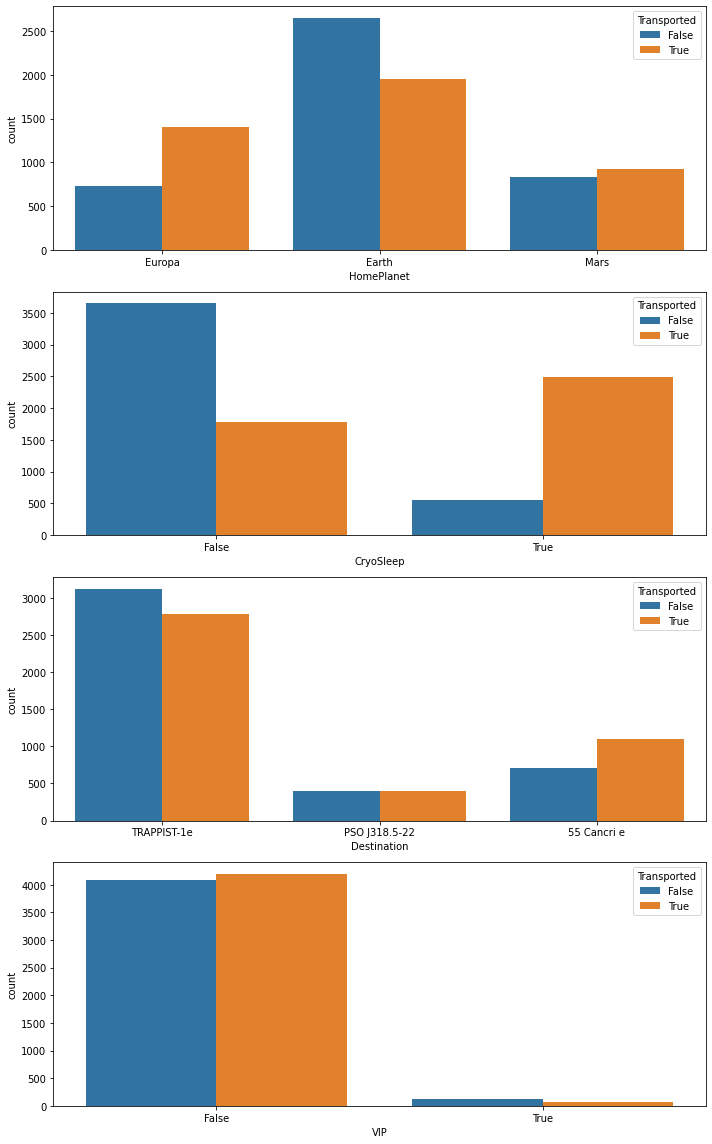

In [ ]:
#그 중 먼저 고향, 냉동 숙면, 목적지 vip에 대한 분석을 시행한다. 

cat_col_1 = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']


fig= plt.figure(figsize=(10,16))
for i, var_name in enumerate(cat_col_1):
    fig.add_subplot(4,1,i+1)
    sns.countplot(data=train, x=var_name, hue='Transported')

fig.tight_layout() 
plt.show()

#VIP 여부는 상관이 없다고 생각할 수 있다. 
#고향 행성에 따라 유로파일 경우 이동 확률 높음 Earth일경우 낮음, 화성은 비슷함
# 냉동수면을 하고 있을경우 이동됨, 안하고 있을경우 실패함 
# 목적지도 크게 의미는 없는데 처음 도착지 사람들이 많이 이동 실패함 . 이 부분 숙면여부랑 관련있는지 보기 

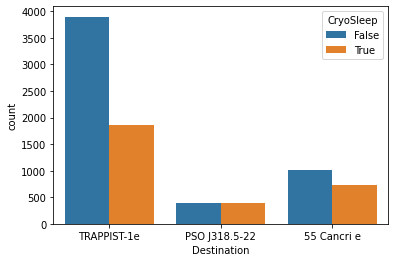

In [ ]:
sns.countplot(data = train, x='Destination', hue = 'CryoSleep')

# 첫번째 목적지 사람들이 냉동 수면을 취하고 있다. --->> 목적지랑 냉동 수면은 overfitting을 만들수도 있겠다는 점. 

In [ ]:
cat_cols_2 = ['PassengerId',"Name", "Cabin"]
train[cat_cols_2]

#passengerid _ 앞에는 한 가족 구성원이고 name 의 뒤는 같은 last_name을 가지고 있는 것을 볼수 있음. 
#가족은 같은 Cabin의 비슷한 위치에 좌석이 위치하는 것을 확인 할 수 있음. 그렇다면 셋다 비슷한 결과를 만들어 낼까 ? 
# 그중에 p/ s즉 좌현 우현은 어떤 차이가 있는지 확인해본다. 

,PassengerId,Name,Cabin
0,0001_01,Maham Ofracculy,B/0/P
1,0002_01,Juanna Vines,F/0/S
2,0003_01,Altark Susent,A/0/S
3,0003_02,Solam Susent,A/0/S
4,0004_01,Willy Santantines,F/1/S
...,...,...,...
8688,9276_01,Gravior Noxnuther,A/98/P
8689,9278_01,Kurta Mondalley,G/1499/S
8690,9279_01,Fayey Connon,G/1500/S
8691,9280_01,Celeon Hontichre,E/608/S


In [ ]:
#passenger id에서 같은 구성원만 구한다. 
#결측치 없었으니까 바로 진행 
#전처리 과정이 아닌 상관관계 볼 예정이기에 나머지 임의의 값넣음. 
train1 = pd.read_csv("train.csv")

for i in range(len(train1['PassengerId'])):
    a, b = train1.loc[:, 'PassengerId'][i].split('_')
    train1.loc[:, 'PassengerId'][i] = a

<ipython-input-24-1ac01e6cc3a5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1.loc[:, 'PassengerId'][i] = a


In [ ]:
train1['PassengerId']

0       0001
1       0002
2       0003
3       0003
4       0004
        ... 
8688    9276
8689    9278
8690    9279
8691    9280
8692    9280
Name: PassengerId, Length: 8693, dtype: object

In [ ]:
#전처리 과정이 아닌 상관관계 볼 예정이기에 나머지 임의의 값넣음. 
#추후에 진행하는 과정에서는 가족 관계에 따라 넣으면 좋을듯. 
#만약 lastname = passenger id 라면 결측치 있는 행을 날릴 수 있음. 

for i in range(len(train1['Name'])):
    try:
        a, b = train1.loc[:, 'Name'][i].split(' ')
        train1.loc[:, 'Name'][i] = a
    except:
        train1.loc[:, 'Name'][i] = 'missing'

<ipython-input-26-d5726cd540bc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1.loc[:, 'Name'][i] = a
<ipython-input-26-d5726cd540bc>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1.loc[:, 'Name'][i] = 'missing'


In [ ]:
train1['Name']

0         Maham
1        Juanna
2        Altark
3         Solam
4         Willy
         ...   
8688    Gravior
8689      Kurta
8690      Fayey
8691     Celeon
8692     Propsh
Name: Name, Length: 8693, dtype: object

In [ ]:
#가운데 번호 날림, Desc번호 남기고 좌현 우현 살리고 차이 볼예정 
import numpy as np 
temp = [] 
temp2 = [] 
for i in range(8693):
    temp.append('0')
    temp2.append('0')
train1['Side'] = temp 
for i in range(len(train1['Cabin'])):
    try:
        a, b, c = train1.loc[:, 'Cabin'][i].split('/')
        train1.loc[:, 'Cabin'][i] = a
        train1.loc[:, 'Side'][i] = c
    except:
        train1.loc[:, 'Cabin'][i] = 'no'
        train1.loc[:, 'Side'][i] = 'no'


<ipython-input-28-fb09e657ca0d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1.loc[:, 'Cabin'][i] = a
<ipython-input-28-fb09e657ca0d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1.loc[:, 'Side'][i] = c
<ipython-input-28-fb09e657ca0d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1.loc[:, 'Cabin'][i] = 'no'
<ipython-input-28-fb09e657ca0d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [ ]:
train1['Side']

0       P
1       S
2       S
3       S
4       S
       ..
8688    P
8689    S
8690    S
8691    S
8692    S
Name: Side, Length: 8693, dtype: object

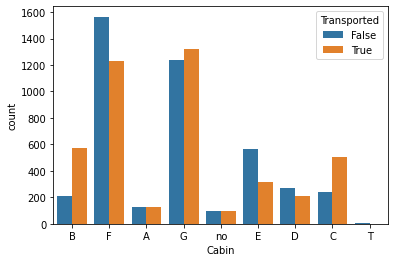

In [ ]:
sns.countplot(data = train1, x= 'Cabin', hue = 'Transported')

#가장 적은 T에 타는 인원은 전부 살지 못함
# A는 생존에 차이가 없음 
# 이동 실패 비율이 많은곳 , *F, *E, D
# 이동한 비율이 많은곳 G, *B , *C 

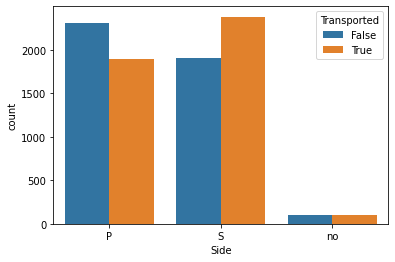

In [ ]:
sns.countplot(data = train1, x= 'Side', hue = 'Transported')
# starboard쪽이 많이 성공하고 p쪽이 많이 실패함

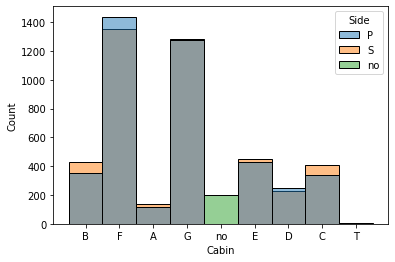

In [ ]:
sns.histplot(data = train1 , x = 'Cabin', hue = 'Side')

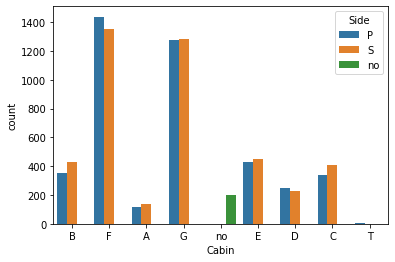

In [ ]:
sns.countplot(data = train1 , x = 'Cabin', hue = 'Side')

#전체적으로 봤을떄 결국 케빈의 위치보다는 좌우 위치가 중요하다고 생각된다. 
#따라서 좌우의 위치를 구해 진행한다. 

> ## 데이터 전처리 

In [134]:
import numpy as np
#EDA를 통해 결정된것. 
#1. 나이를 그룹화해서 진행한다. 
#2. 숫자 소비에는 두가지 분포가 있으므로 나눠서 진행한다. 
#3. 네임은 지운다. 
#4. 케빈 동은 놔두고 좌현 우현 따로 빼고 가운데 숫자는 지운다. 
#5. VIP는 의미 없어보이는 지수로 삭제한다. 
#6. 현재 중요하게 생각되는거 동면 여부, 좌현 우현, 
#7. 첫번째 도착지와 동면 여부는 상관관계가 있는 것처럼 보인다. == 도착지도 좋은 선택지 일듯 하다.

In [186]:
#1. 나이를 그룹화해서 진행하기 # 0 ~ 15 하나로 이후부터는 7살 차이로 진행  50세 이상은 하나로 
#그룹화, 
train['Age_group'] = np.nan #새로운 행 생성 
train.loc[train['Age']<=17,'Age_group']='A'
train.loc[(train['Age']>17) & (train['Age']<23),'Age_group']='B'
train.loc[(train['Age']>=23) & (train['Age']<=27),'Age_group']='C'
train.loc[(train['Age']>27) & (train['Age']<=40),'Age_group']='D'
train.loc[(train['Age']>40) & (train['Age']<=50),'Age_group']='E'
train.loc[train['Age']>50,'Age_group']='F'

test['Age_group'] = np.nan #새로운 행 생성 
test.loc[test['Age']<=17,'Age_group']='A'
test.loc[(test['Age']>17) & (test['Age']<23),'Age_group']='B'
test.loc[(test['Age']>=23) & (test['Age']<=27),'Age_group']='C'
test.loc[(test['Age']>27) & (test['Age']<=40),'Age_group']='D'
test.loc[(test['Age']>40) & (test['Age']<=50),'Age_group']='E'
test.loc[test['Age']>50,'Age_group']='F'

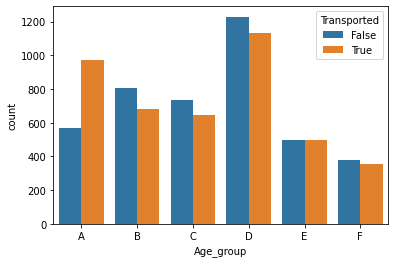

In [7]:
sns.countplot(data=train, x='Age_group', hue='Transported', order=['A','B','C','D','E','F'])

In [187]:
del train['Age']

In [188]:
del test['Age']
# 완료된것 삭제  . 

In [189]:
# 2. 숫자 소비에는 두가지 분포가 있으므로 나눠서 진행한다. 
# A그룹(roomservice, spa, vrDeck 의 분포가 비슷하고 ) B그룹(foodCourt, shoppingmall 의 분포가 비슷하다.)
# 숙면자는 돈을 소비하지 않는것도 알기에 3가지로 카테고리컬로 만든다. A그룹 소비가 제일 큰사람 

# train['Expenditure']=train[exp_feats].sum(axis=1)
num_cols = train.select_dtypes(exclude = 'object')
del num_cols['Transported']
temp = num_cols.columns

temp

A = ['RoomService', 'Spa', "VRDeck"]
B = ['FoodCourt', 'ShoppingMall']
train['Rich_spender']=train[A].sum(axis=1)
train['Normal_spender']=train[B].sum(axis =1)


In [190]:
train['No_spending'] = (train['Rich_spender'] + train['Normal_spender']==0).astype(int)

In [191]:
test['Rich_spender']=test[A].sum(axis=1)
test['Normal_spender']=test[B].sum(axis =1)
test['No_spending'] = (test['Rich_spender'] + test['Normal_spender']==0).astype(int)

In [192]:
del_col = ['RoomService', 'Spa', "VRDeck", 'FoodCourt', 'ShoppingMall']
for i in del_col:
    del train[i]
    del test[i]

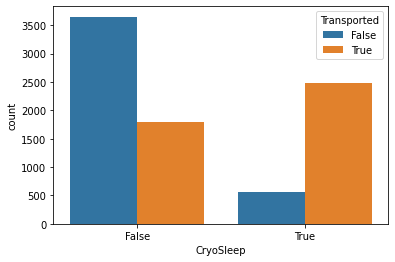

In [ ]:
sns.countplot(data = train, x = 'CryoSleep', hue ='Transported')

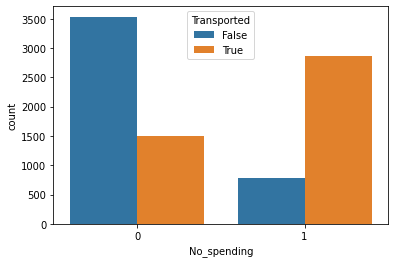

In [ ]:
sns.countplot(data = train, x = 'No_spending', hue ='Transported')

In [193]:
#3. 네임은 지운다. 
del train['Name']
del test['Name']

In [194]:
#5.-1  VIP는 의미 없어보이는 지수로 삭제한다. 

del test['VIP']

In [195]:
del train['VIP']

In [143]:
#5-2 VIP를 살리는 방식으로도 진행해 본다. 
# temp = train[train['VIP'].isnull()].index

# for i in temp:
#     train.loc[i, "VIP"] = False

# train['VIP'].isnull().sum()
# 확실히 점수가 떨어지는 것을 발견 

0

In [144]:
# temp = test[test['VIP'].isnull()].index

# for i in temp:
#     test.loc[i, "VIP"] = False


In [30]:
# train['VIP'].isnull().sum()

203

In [196]:
#4. 케빈 동은 놔두고 좌현 우현 따로 빼고 가운데 숫자는 지운다. 
import numpy as np 
temp = [] 
temp2 = [] 
for i in range(8693):
    temp.append('0')
    temp2.append('0')
train['Side'] = temp 
for i in range(len(train['Cabin'])):
    try:
        a, b, c = train.loc[:, 'Cabin'][i].split('/')
        train.loc[:, 'Cabin'][i] = a
        train.loc[:, 'Side'][i] = c
    except:
        train.loc[:, 'Cabin'][i] = 'no'
        train.loc[:, 'Side'][i] = 'no'

<ipython-input-196-77ed6844165a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[:, 'Cabin'][i] = a
<ipython-input-196-77ed6844165a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[:, 'Side'][i] = c
<ipython-input-196-77ed6844165a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[:, 'Cabin'][i] = 'no'
<ipython-input-196-77ed6844165a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [197]:
temp = [] 
temp2 = [] 
for i in range(4277):
    temp.append('0')
    temp2.append('0')
test['Side'] = temp 
for i in range(len(test['Cabin'])):
    try:
        a, b, c = test.loc[:, 'Cabin'][i].split('/')
        test.loc[:, 'Cabin'][i] = a
        test.loc[:, 'Side'][i] = c
    except:
        test.loc[:, 'Cabin'][i] = 'no'
        test.loc[:, 'Side'][i] = 'no'

<ipython-input-197-0261e7c09927>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'Cabin'][i] = a
<ipython-input-197-0261e7c09927>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'Side'][i] = c
<ipython-input-197-0261e7c09927>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'Cabin'][i] = 'no'
<ipython-input-197-0261e7c09927>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [ ]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Transported,Age_group,Rich_spender,Normal_spender,No_spending,Side
0,0001_01,Europa,False,B,TRAPPIST-1e,False,D,0.0,0.0,1,P
1,0002_01,Earth,False,F,TRAPPIST-1e,True,C,702.0,34.0,0,S
2,0003_01,Europa,False,A,TRAPPIST-1e,False,F,6807.0,3576.0,0,S
3,0003_02,Europa,False,A,TRAPPIST-1e,False,D,3522.0,1654.0,0,S
4,0004_01,Earth,False,F,TRAPPIST-1e,True,A,870.0,221.0,0,S
...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A,55 Cancri e,False,E,1717.0,6819.0,0,P
8689,9278_01,Earth,True,G,PSO J318.5-22,False,B,0.0,0.0,1,S
8690,9279_01,Earth,False,G,TRAPPIST-1e,True,C,1.0,1872.0,0,S
8691,9280_01,Europa,False,E,55 Cancri e,False,D,3588.0,1049.0,0,S


In [198]:
train['id_2'] = np.nan
for i in range(len(train['PassengerId'])):
    a, b = train.loc[:, 'PassengerId'][i].split('_')
    train.loc[:, 'PassengerId'][i] = a
    train.loc[i:i,'id_2'] = b

<ipython-input-198-3f3335b40860>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[:, 'PassengerId'][i] = a


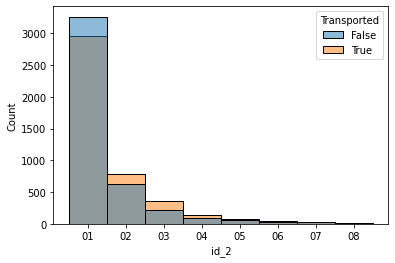

In [ ]:
sns.histplot(data = train, x = 'id_2', hue = 'Transported')


In [199]:
test['id_2'] = np.nan
for i in range(len(test['PassengerId'])):
    a, b = test.loc[:, 'PassengerId'][i].split('_')
    test.loc[:, 'PassengerId'][i] = a
    test.loc[i:i,'id_2'] = b

<ipython-input-199-09d8f474ec60>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'PassengerId'][i] = a


In [200]:
#모델에 사용할 x, y 데이터 구성 

y = train['Transported']
del train['Transported']
X = train

X


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age_group,Rich_spender,Normal_spender,No_spending,Side,id_2
0,0001,Europa,False,B,TRAPPIST-1e,D,0.0,0.0,1,P,01
1,0002,Earth,False,F,TRAPPIST-1e,C,702.0,34.0,0,S,01
2,0003,Europa,False,A,TRAPPIST-1e,F,6807.0,3576.0,0,S,01
3,0003,Europa,False,A,TRAPPIST-1e,D,3522.0,1654.0,0,S,02
4,0004,Earth,False,F,TRAPPIST-1e,A,870.0,221.0,0,S,01
...,...,...,...,...,...,...,...,...,...,...,...
8688,9276,Europa,False,A,55 Cancri e,E,1717.0,6819.0,0,P,01
8689,9278,Earth,True,G,PSO J318.5-22,B,0.0,0.0,1,S,01
8690,9279,Earth,False,G,TRAPPIST-1e,C,1.0,1872.0,0,S,01
8691,9280,Europa,False,E,55 Cancri e,D,3588.0,1049.0,0,S,01


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     8693 non-null   object 
 1   HomePlanet      8492 non-null   object 
 2   CryoSleep       8476 non-null   object 
 3   Cabin           8693 non-null   object 
 4   Destination     8511 non-null   object 
 5   Age_group       8514 non-null   object 
 6   Rich_spender    8693 non-null   float64
 7   Normal_spender  8693 non-null   float64
 8   No_spending     8693 non-null   int64  
 9   Side            8693 non-null   object 
 10  id_2            8693 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 747.2+ KB


> ## 결측치 채우기 

In [ ]:
#결측치 채우기 
# 현재 Cabin , side, id_2에는 'no'라는 단어로 채워놨다 . 
X.isnull().sum()

PassengerId         0
HomePlanet        201
CryoSleep         217
Cabin               0
Destination       182
Age_group         179
Rich_spender        0
Normal_spender      0
No_spending         0
Side                0
id_2                0
dtype: int64

In [201]:
#앞뒤로 passenger Id가 같으면 같은 가족이라고 판단을 하고  같은 고향을 배정해 준다. 
temp_home = X[X['HomePlanet'].isnull()].index


for i in temp_home:
    if X.loc[i-1,'PassengerId'] == X.loc[i,'PassengerId']:
        X.loc[i,'HomePlanet'] = X.loc[i-1, 'HomePlanet']
    elif X.loc[i+1,'PassengerId'] == X.loc[i,'PassengerId']:
        X.loc[i, 'HomePlanet'] = X.loc[i,'HomePlanet']

In [202]:
X.loc[:, 'HomePlanet'].isnull().sum()

# 같이 온 가족이 없는 경우 도 여전히 존재한다 이경우 최빈값인 Earth를 준다. 

temp_home = X[X['HomePlanet'].isnull()].index


In [203]:
for i in temp_home:
    X.loc[i,'HomePlanet'] = 'Earth'

In [204]:
temp_home = test[test['HomePlanet'].isnull()].index

for i in temp_home:
    if test.loc[i-1,'PassengerId'] == test.loc[i,'PassengerId']:
        test.loc[i,'HomePlanet'] = test.loc[i-1, 'HomePlanet']
    elif test.loc[i+1,'PassengerId'] == test.loc[i,'PassengerId']:
        test.loc[i, 'HomePlanet'] = test.loc[i,'HomePlanet']

In [205]:
test.loc[:, 'HomePlanet'].isnull().sum()

# 같이 온 가족이 없는 경우 도 여전히 존재한다 이경우 최빈값인 Earth를 준다. 

temp_home = test[test['HomePlanet'].isnull()].index
for i in temp_home:
    test.loc[i,'HomePlanet'] = 'Earth'

In [206]:
X.loc[:, 'HomePlanet'].isnull().sum()


0

In [207]:
test.loc[:, 'HomePlanet'].isnull().sum()


0

In [208]:
#cryosleep 채우기 
X.loc[:, 'CryoSleep'].isnull().sum()


217

In [209]:
temp_sleep = X[X.loc[:, 'CryoSleep'].isnull()].index
for i in temp_sleep:
    if X.loc[i,'No_spending'] == 0:
        X.loc[i, 'CryoSleep'] = True
    else:
        X.loc[i, 'CryoSleep'] = False

In [210]:
temp_sleep = test[test.loc[:, 'CryoSleep'].isnull()].index
for i in temp_sleep:
    if test.loc[i,'No_spending'] == 0:
        test.loc[i, 'CryoSleep'] = True
    else:
        test.loc[i, 'CryoSleep'] = False

In [211]:
X.loc[:, 'CryoSleep'].isnull().sum()


0

In [212]:
test.loc[:, 'CryoSleep'].isnull().sum()


0

In [162]:
X[X.loc[:, 'Destination'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Age_group,Rich_spender,Normal_spender,No_spending,Side,id_2
47,0045,Mars,True,F,NaN,False,B,0.0,0.0,1,P,02
128,0138,Earth,False,E,NaN,False,D,771.0,22.0,0,P,02
139,0152,Earth,False,F,NaN,False,E,607.0,0.0,0,P,01
347,0382,Earth,False,G,NaN,False,C,720.0,0.0,0,P,01
430,0462,Earth,True,G,NaN,False,E,0.0,0.0,1,S,01
...,...,...,...,...,...,...,...,...,...,...,...,...
8372,8956,Earth,True,G,NaN,False,B,0.0,0.0,1,P,02
8551,9130,Mars,True,F,NaN,False,E,0.0,0.0,1,S,01
8616,9195,Mars,True,F,NaN,False,D,0.0,0.0,1,S,02
8621,9197,Europa,False,C,NaN,True,E,9077.0,7964.0,0,P,02


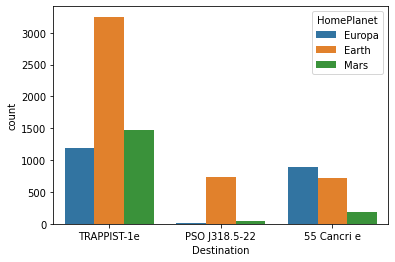

In [116]:
sns.countplot(data = X, x = 'Destination', hue = 'HomePlanet')

#각 출신 행성에 따라 배정한다. ?

In [213]:
#전체적으로 목적지가 처음에 집중되어있다는 점을 확인 

temp_Dest = X[X.loc[:, 'Destination'].isnull()].index

In [214]:
for i in temp_Dest:
    X.loc[i,'Destination']  = 'TRAPPIST-1e'


In [215]:
temp_Dest = test[test.loc[:, 'Destination'].isnull()].index
for i in temp_Dest:
    test.loc[i,'Destination']  = 'TRAPPIST-1e'

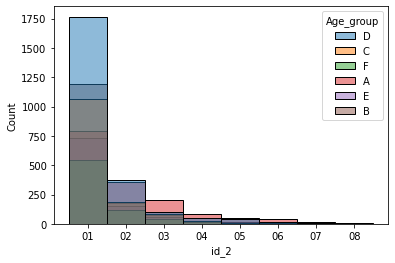

In [ ]:
#age group 에 대한 결측치 채우기 
#id_2 의 경우 한 그룹의 숫자이기에 숫자가 높을수록 어린 아이라고 생각을 해봤다. 봤을떄 실제로 1번에 나이가 높은 그룹이 있고, 
# 반대로 높은 그룹에는 A그룹이 많은 것을 볼수 있다. 
sns.histplot(data = X ,x ='id_2', hue = 'Age_group' )


In [ ]:
X.groupby('id_2')['Age_group'].agg(pd.Series.mode)

#각각의 id_2에 맞는 age_group의 최빈값 구해서 넣어준다. 

id_2
01    D
02    D
03    A
04    A
05    A
06    A
07    A
08    A
Name: Age_group, dtype: object

In [216]:
#Age_group 과 뒤에 번호가 관련이 되어있다고 판단 
X.loc[(X['id_2']== '01') & (X['Age_group'].isna()), 'Age_group'] = 'D'
X.loc[(X['id_2']== '02') & (X['Age_group'].isna()), 'Age_group'] = 'D'
X.loc[(X['id_2']== '03') & (X['Age_group'].isna()), 'Age_group'] = 'A'
X.loc[(X['id_2']== '04') & (X['Age_group'].isna()), 'Age_group'] = 'A'
X.loc[(X['id_2']== '05') & (X['Age_group'].isna()), 'Age_group'] = 'A'
X.loc[(X['id_2']== '06') & (X['Age_group'].isna()), 'Age_group'] = 'A'
X.loc[(X['id_2']== '07') & (X['Age_group'].isna()), 'Age_group'] = 'A'
X.loc[(X['id_2']== '08') & (X['Age_group'].isna()), 'Age_group'] = 'A'

In [217]:
X.loc[:, 'Age_group'].isnull().sum()

0

In [218]:
test.loc[(test['id_2']== '01') & (test['Age_group'].isna()), 'Age_group'] = 'D'
test.loc[(test['id_2']== '02') & (test['Age_group'].isna()), 'Age_group'] = 'D'
test.loc[(test['id_2']== '03') & (test['Age_group'].isna()), 'Age_group'] = 'A'
test.loc[(test['id_2']== '04') & (test['Age_group'].isna()), 'Age_group'] = 'A'
test.loc[(test['id_2']== '05') & (test['Age_group'].isna()), 'Age_group'] = 'A'
test.loc[(test['id_2']== '06') & (test['Age_group'].isna()), 'Age_group'] = 'A'
test.loc[(test['id_2']== '07') & (test['Age_group'].isna()), 'Age_group'] = 'A'
test.loc[(test['id_2']== '08') & (test['Age_group'].isna()), 'Age_group'] = 'A'

In [219]:
test.loc[:, 'Age_group'].isnull().sum()

0

In [170]:
X.loc[X['Cabin']== 'no']

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Age_group,Rich_spender,Normal_spender,No_spending,Side,id_2
15,0012,Earth,False,no,TRAPPIST-1e,False,D,32.0,876.0,0,no,01
93,0101,Mars,True,no,TRAPPIST-1e,False,D,0.0,0.0,1,no,01
103,0110,Europa,False,no,TRAPPIST-1e,False,D,4693.0,416.0,0,no,01
222,0239,Mars,False,no,TRAPPIST-1e,False,D,1048.0,0.0,0,no,01
227,0244,Mars,True,no,TRAPPIST-1e,False,E,0.0,0.0,1,no,01
...,...,...,...,...,...,...,...,...,...,...,...,...
8209,8772,Europa,False,no,55 Cancri e,False,F,3939.0,1127.0,0,no,02
8475,9057,Europa,False,no,55 Cancri e,True,D,3918.0,3479.0,0,no,01
8485,9069,Europa,True,no,55 Cancri e,False,C,0.0,0.0,1,no,03
8509,9081,Earth,True,no,TRAPPIST-1e,False,A,0.0,0.0,1,no,03


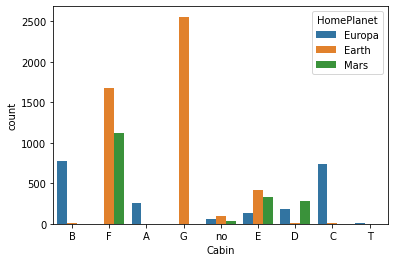

In [ ]:
sns.countplot(data =X, x = 'Cabin', hue = 'HomePlanet')
# 고향을 기준으로 동을 봤을때 특정 동에 특정 고향인들이 몰려있는 것을 확인 할수 있다. 
# 결측치에 고향별 최빈값으로 넣는다. 
# Europa 는 B, Earth 는 G Mars 는 F

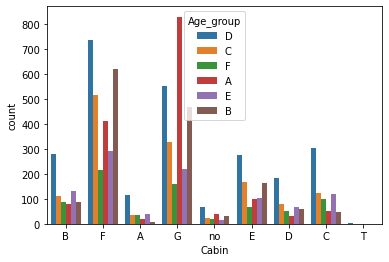

In [ ]:
sns.countplot(data =X, x = 'Cabin', hue = 'Age_group')
#나이는 별로 상관이 없다고 판단. 

In [220]:
X.loc[(X['HomePlanet']== 'Europa') & (X['Cabin']== 'no'), 'Cabin'] = 'B'
X.loc[(X['HomePlanet']== 'Mars') & (X['Cabin']== 'no'), 'Cabin'] = 'F'
X.loc[(X['HomePlanet']== 'Earth') & (X['Cabin']== 'no'), 'Cabin'] = 'G'

In [221]:
test.loc[(test['HomePlanet']== 'Europa') & (test['Cabin']== 'no'), 'Cabin'] = 'B'
test.loc[(test['HomePlanet']== 'Mars') & (test['Cabin']== 'no'), 'Cabin'] = 'F'
test.loc[(test['HomePlanet']== 'Earth') & (test['Cabin']== 'no'), 'Cabin'] = 'G'

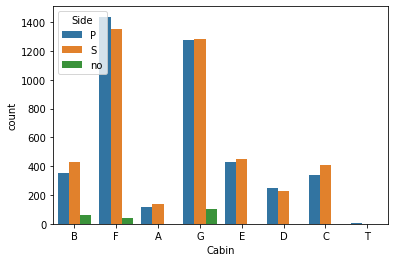

In [ ]:
sns.countplot(data = train, x= 'Cabin', hue = 'Side')

In [222]:
#사이드는 반반이니까 랜덤으로 넣는다 
import random

pocket = ['S', 'P']


In [223]:
X.loc[X['Side']=='no', 'Side'] = random.choice(pocket)

test.loc[test['Side']=='no', 'Side'] = random.choice(pocket)

In [79]:
#결측치 제거 완료
X.info(),  test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     8693 non-null   object 
 1   HomePlanet      8693 non-null   object 
 2   CryoSleep       8693 non-null   object 
 3   Cabin           8693 non-null   object 
 4   Destination     8693 non-null   object 
 5   VIP             8693 non-null   object 
 6   Age_group       8693 non-null   object 
 7   Rich_spender    8693 non-null   float64
 8   Normal_spender  8693 non-null   float64
 9   No_spending     8693 non-null   int64  
 10  Side            8693 non-null   object 
 11  id_2            8693 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 815.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0

(None, None)

In [224]:
del test['PassengerId']
del X['PassengerId']

In [ ]:
X

,HomePlanet,CryoSleep,Cabin,Destination,Age_group,Rich_spender,Normal_spender,No_spending,Side,id_2
0,Europa,False,B,TRAPPIST-1e,D,0.0,0.0,1,P,01
1,Earth,False,F,TRAPPIST-1e,C,702.0,34.0,0,S,01
2,Europa,False,A,TRAPPIST-1e,F,6807.0,3576.0,0,S,01
3,Europa,False,A,TRAPPIST-1e,D,3522.0,1654.0,0,S,02
4,Earth,False,F,TRAPPIST-1e,A,870.0,221.0,0,S,01
...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A,55 Cancri e,E,1717.0,6819.0,0,P,01
8689,Earth,True,G,PSO J318.5-22,B,0.0,0.0,1,S,01
8690,Earth,False,G,TRAPPIST-1e,C,1.0,1872.0,0,S,01
8691,Europa,False,E,55 Cancri e,D,3588.0,1049.0,0,S,01


In [225]:
X['CryoSleep'].astype('str')
X['HomePlanet'].astype('str')

0       Europa
1        Earth
2       Europa
3       Europa
4        Earth
         ...  
8688    Europa
8689     Earth
8690     Earth
8691    Europa
8692    Europa
Name: HomePlanet, Length: 8693, dtype: object

In [226]:
test = test.astype({"CryoSleep" : 'str'})
X = X.astype({"CryoSleep" : 'str'})


> ## 데이터 인코딩 

In [227]:

from sklearn.preprocessing import LabelEncoder
lb_enc1 = LabelEncoder()

X['HomePlanet'] = lb_enc1.fit_transform(X['HomePlanet'])
test['HomePlanet'] = lb_enc1.transform(test['HomePlanet'])

X['CryoSleep'] = lb_enc1.fit_transform(X['CryoSleep'])
test['CryoSleep'] = lb_enc1.transform(test['CryoSleep'])

X['Cabin'] = lb_enc1.fit_transform(X['Cabin'])
test['Cabin'] = lb_enc1.transform(test['Cabin'])

X['Destination'] = lb_enc1.fit_transform(X['Destination'])
test['Destination'] = lb_enc1.transform(test['Destination'])

X['Age_group'] = lb_enc1.fit_transform(X['Age_group'])
test['Age_group'] = lb_enc1.transform(test['Age_group'])

X['Side'] = lb_enc1.fit_transform(X['Side'])
test['Side'] = lb_enc1.transform(test['Side'])

X['id_2'] = lb_enc1.fit_transform(X['id_2'])
test['id_2'] = lb_enc1.transform(test['id_2'])




In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HomePlanet      8693 non-null   int64  
 1   CryoSleep       8693 non-null   int64  
 2   Cabin           8693 non-null   int64  
 3   Destination     8693 non-null   int64  
 4   Age_group       8693 non-null   int64  
 5   Rich_spender    8693 non-null   float64
 6   Normal_spender  8693 non-null   float64
 7   No_spending     8693 non-null   int64  
 8   Side            8693 non-null   int64  
 9   id_2            8693 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 679.3 KB


> ## 모델확인 

In [228]:
# 모델 선정  + 각각의 그리 서치 진행하기 .

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
lg_model = LogisticRegression(random_state =0)
svc_model = SVC(random_state = 0, probability= True)
dt_model = DecisionTreeClassifier(random_state =0)
rf_model = RandomForestClassifier(random_state =0)


lg_param ={
           'penalty': ['l1','l2'],
           'C': [0.1, 1, 5],

}

svc_param = {
            'C': [0.5, 1, 1.5],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
}

dt_param = {
            "criterion" : ["gini", "entropy"],
            "max_depth" :   [2, 5, 8],
            "min_samples_leaf" : [1, 3, 5, 7]
}

rf_param = {
        'n_estimators': [100, 200,  300],  
        'max_depth': [4, 6, 8]
}

In [ ]:
clf_lg = GridSearchCV(lg_model, param_grid = lg_param, cv = 3)


In [ ]:
clf_lg.fit(X, y)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=0),
             param_grid={'C': [0.1, 1, 5], 'penalty': ['l1', 'l2']})

In [ ]:
clf_lg.score(X,y), clf_lg.best_params_

(0.7878753019671, {'C': 0.1, 'penalty': 'l2'})

In [234]:
xgb_model = XGBClassifier(random_state = 0)

xgb_param = {
    "booster" : ["gbtree", "dart"],
    "eta" : [0.1, 0.3, 0.5, 0.7],
    "max_depth" : [3,5,7]
}



clf_xgb = GridSearchCV(xgb_model, param_grid = xgb_param, cv = 3)


In [235]:
clf_xgb.fit(X,y)

GridSearchCV(cv=3, estimator=XGBClassifier(),
             param_grid={'booster': ['gbtree', 'dart'],
                         'eta': [0.1, 0.3, 0.5, 0.7], 'max_depth': [3, 5, 7]})

In [236]:
clf_xgb.score(X, y), clf_xgb.best_params_

(0.8296330380766134, {'booster': 'gbtree', 'eta': 0.1, 'max_depth': 5})

In [268]:
pred2 = clf_xgb.predict(test)

df11 = pd.read_csv("test.csv")
id = df11[['PassengerId']]
pred2 = pd.DataFrame(pred2, columns = ['Transported'])
answer = pd.concat([id, pred2],axis = 1)
answer.to_csv("answer_onlyxgboost.csv", index = False)


In [258]:
cb_model = CatBoostClassifier(verbose=False, random_state=0)
cb_model.fit(X,y)

In [259]:
cb_model.score(X, y)

0.8466582307603819

In [262]:
pred1 = cb_model.predict(test)

In [265]:
pred1

array(['True', 'False', 'True', ..., 'True', 'True', 'True'], dtype=object)

In [269]:
df11 = pd.read_csv("test.csv")
id = df11[['PassengerId']]
pred1 = pd.DataFrame(pred1, columns = ['Transported'])
answer = pd.concat([id, pred1],axis = 1)
answer.to_csv("answer_only_catboost.csv", index = False)


In [180]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 7.5 MB/s eta 0:00:00


In [229]:
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [243]:
from sklearn.ensemble import VotingClassifier
lg_model = LogisticRegression(C = 0.1, penalty = 'l2')
svc_model = SVC(probability= True)
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
ct_model = CatBoostClassifier(random_state=0, verbose=False)
lgb_model = LGBMClassifier(random_state =0)
cb_model = CatBoostClassifier(verbose=False, random_state=0)
vo_clf = VotingClassifier( estimators=[('LR',lg_model),('SVC',svc_model),('Dt',dt_model),('RF', rf_model),('CT', ct_model), ('LGB', lgb_model), ('CB', cb_model) ] , voting='hard' )

In [244]:
vo_clf.fit(X , y)
pred = vo_clf.predict(test)

df11 = pd.read_csv("test.csv")
id = df11[['PassengerId']]
pred = pd.DataFrame(pred, columns = ['Transported'])
answer = pd.concat([id, pred],axis = 1)
answer.to_csv("answer.csv", index = False)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [270]:
from sklearn.ensemble import VotingClassifier
ct_model = CatBoostClassifier(random_state=0, verbose=False)
lgb_model = LGBMClassifier(random_state =0)
xgb_model = XGBClassifier(random_state = 0)
vo_clf = VotingClassifier( estimators=[('CT', ct_model), ('LGB', lgb_model), ('XGB', xgb_model) ] , voting='soft' )

vo_clf.fit(X , y)
pred = vo_clf.predict(test)

df11 = pd.read_csv("test.csv")
id = df11[['PassengerId']]
pred = pd.DataFrame(pred, columns = ['Transported'])
answer = pd.concat([id, pred],axis = 1)
answer.to_csv("answer_only_highest.csv", index = False)
